# Шаг 1. Знакомство с данными и предобработка. Приоретизация гипотез

**Примерный алгоритм выполнения шага:**
- подключить библиотеки
- создать переименные и "открыть" в них данные
- посмотреть на данные
- найти несоответствие типа данных с их назначением
- исправить типы данных на корректные
- проверить данные на предмет пропусков и дубликатов

**Наименование исследования: "Анализ гипотез для увеличения выручки крупного интернет-магазина"**

- **Цель исследования:** предоставить рекомендацию руководству интернет-магазина, какие методы увеличения прибыли являются наиболее перспективными с помощью проведения A/B теста.

- **Задачи исследования:** рассчитать ключевые метрики и статистические особенности "поведения" гипотез и спрогнозировать потенциальную эффективность применения акции "на практике"

**Ожидаемый результат исследования:** предоставление обоснованной рекомендации руководству интернет-магазина и принятие решения, какая из групп теста показала лучшие характеристики и нужно ли продолжать тестирование

## 1.1. Знакомство с данными и предобработка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option("max_colwidth", 700) # изменим границы стобцов, чтобы оставить возможность прочесть полную формулировку гипотезы
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [5]:
hypothesis.duplicated().sum()

0

**Итог знакомства с первым датасетом:**
- Нет проблем с типом данных
- Нет дубликатов и пропусков
- Едиственное, что не очень хорошо - название столбцов с большой буквы, что не соответствуют "правилам хорошего кода", стоит исправить

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns.tolist()

['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
orders.duplicated().sum()

0

In [11]:
orders = orders.rename(columns={"transactionId": "transaction_id", "visitorId": "visitor_id"}) # назовем столбцы корректно

In [12]:
display(orders)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


**Итог знакомства со вторым датасетом:**
- Неправильный тип данных в столбце date
- Нет дубликатов и пропусков
- Наименования приведены к змеиному регистру

In [13]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y%m%dT%H:%M:%S')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [17]:
visitors.duplicated().sum()

0

**Итог знакомства с третьим датасетом:**
- Неправильный тип данных в столбце date
- Нет дубликатов и пропусков

In [18]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y%m%dT%H:%M:%S')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Вывод:** трудоемкая предобработка не потребовалась, некорректный тип столбцов с датами был исправлен, теперь данные полностью готовы к исследованию

## 1.2. Приоретизация гипотез

Примерный алгоритм действий:
- рассчитать ICE
- рассчитать RICE
- предположить, чем могла быть вызвана разница в показателях
- зафиксировать наиболее перспективные гипотезы

### Рассчитаем ICE:

In [19]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
pd.set_option("max_colwidth", 700) # изменим границы стобцов, чтобы оставить возможность прочесть полную формулировку гипотезы
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(1)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Применение метода ICE символизирует о том, что наиболее перспективными можно считать гипотезы:
- №8 (Запустить акцию, дающую скидку на товар в день рождения),
- 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей),
- "третий" показатель у гипотезы №7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)

### Рассчитаем RICE:

In [20]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']) / hypothesis['efforts']
pd.set_option("max_colwidth", 700)
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Метод показывает, что гипотеза №7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) намного перспективнее прочих. На втором месте - гипотеза №2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа), гипотезы №0 и 6 на третьем месте.

Имеет смысл посмотреть на сравнительную таблицу, чтобы увидеть различия между ICE и RICE

In [21]:
hypothesis_comparison = hypothesis[['hypothesis','ICE','RICE']].round(1)
display(hypothesis_comparison)

,hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2


### Что повлияло на разницу в "перспективности" гипотез?

Ответ на вопрос содержится в самих формулах, по которым производилась оценка гипотез. Параметр Reach, который "появился" в расчете RICE, отражает "скольких пользователей затронет изменение". Иными словами, причиной в изменениях показателей стал показатель количества клиентов, которые "почувствуют" изменения, которые сейчас тестируются.

## 1.3. Вывод

Были определены перспективные гипотезы. С учетом показателя охвата целевой аудитории (RICE) наиболее перспективной видится гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Сам по себе метод не является "агрессивным", а с учетом грамотной рассылки, равно как и правильной подачи "мотивации" клиента оставить почту может ощутимо увеличить показатели прибыли интернет-магазина. 

# Шаг 2. Анализ A/B-теста

## 2.1. Построение графика кумулятивной выручки по группам

Прежде, чем приступить к расчетам, проверим количество участников в каждой из групп:

In [22]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Найдем, есть ли пользователи и в той и в другой группе:

In [23]:
double_user = orders.pivot_table(index='visitor_id', values='group', aggfunc='nunique')
display(double_user.query('group > 1').count())

group    58
dtype: int64

58 участников есть и в той и другой группе. Рискну предположить, что можно пренебречь получившимся значением, т.к. их количество невелико и не должно исказить исследование. Возможно, это группа неких тестовых пользователей, данные о которой попали к нам.

Создаем новый датафрейм datesGroups путем удаления дубликатов, следовательно, останутся только уникальные значения

In [24]:
datesGroups = orders[['date','group']].drop_duplicates()

In [25]:
display(datesGroups.head())

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Теперь запишем в новую переменную следующие данные:
- дата;
- группа A/B-теста;
- число уникальных заказов в группе теста по указанную дату (включительно);
- число пользователей за интересующий диапазон времени;
- суммарную выручку заказов в группе теста.

In [26]:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Идентичной методикой вычислим кумулятивные данные о посетителях интернет-магазина (по дням):

In [27]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

С помощью метода merge объединим имеющиеся датафреймы по общим столбцам и переименуем их:

In [28]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [29]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [30]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

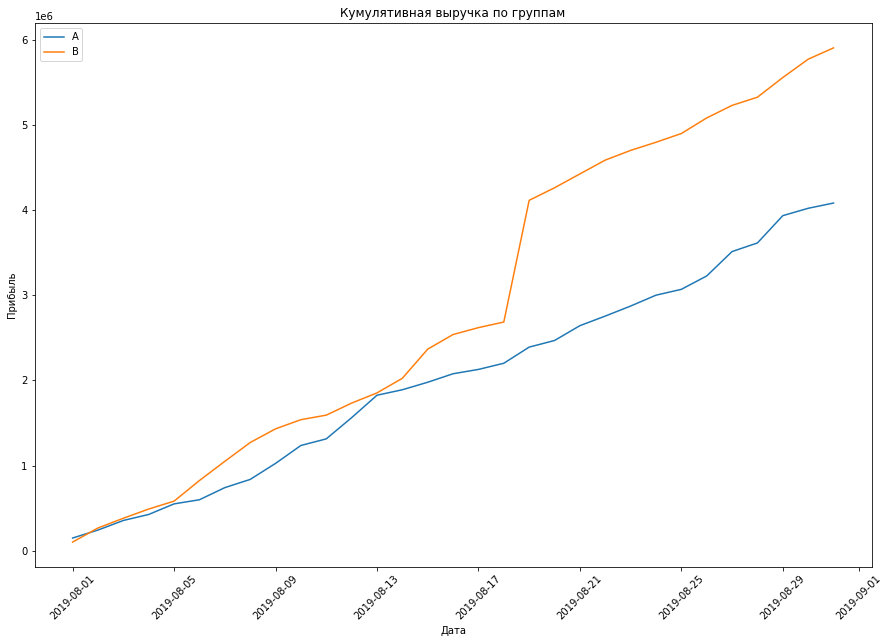

In [31]:
plt.figure(figsize=(15,10))
#Кривая выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

#Кривая выручки группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=45)
plt.legend() 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Прибыль')


plt.show()

Стоит попробовать немного "оживить" график и нанести на него пометки

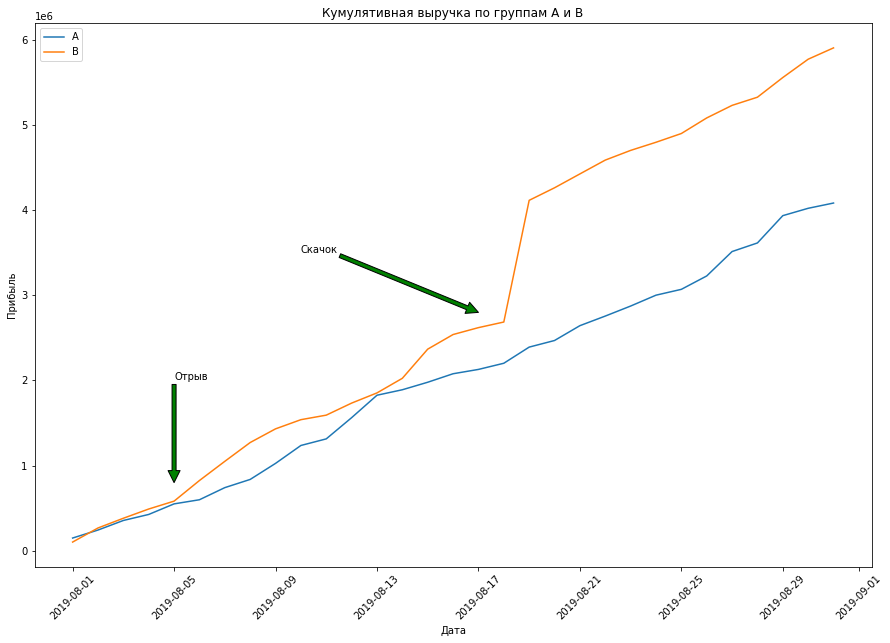

In [32]:
plt.figure(figsize=(15,10))
#Кривая выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

#Кривая выручки группы А
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=45)
plt.legend() 
plt.title('Кумулятивная выручка по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Прибыль')
plt.annotate('Скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('Отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 

plt.show()

График позволяет сказать о том, что группа В "оторвалась" от группы А 5-го августа, прибыль достигала 800000, 17 августа при показателях выручки в 2800000 рублей наблюдается резкий отрыв. Полагаю, имеют место аномалии, которые и исказили кривые.

## 2.2. График кумулятивного среднего чека по группам

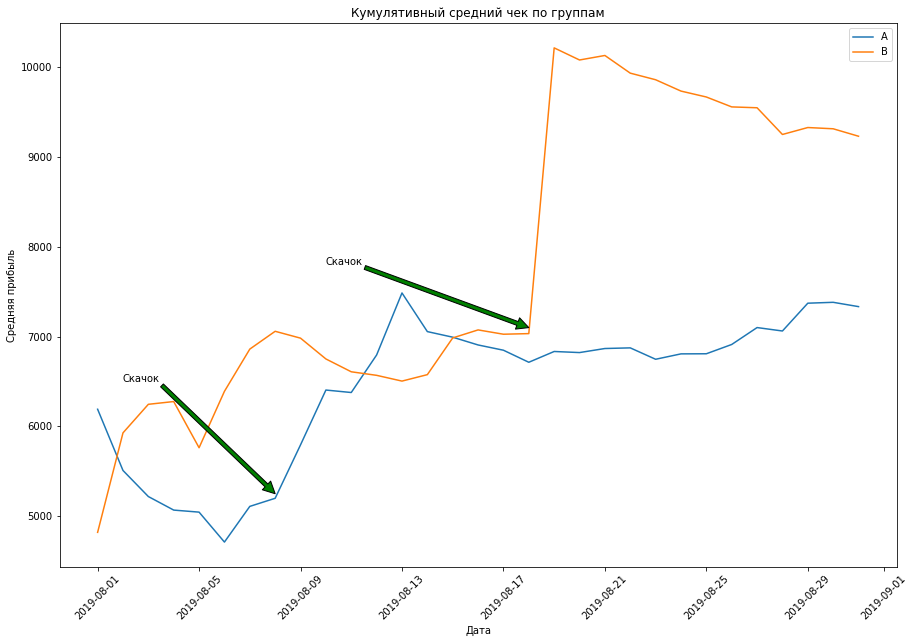

In [33]:
plt.figure(figsize=(15,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средняя прибыль')
plt.legend() 
plt.annotate('Скачок', xy=('2019-08-18', 7100), xytext=('2019-08-10', 7800),
            arrowprops=dict(facecolor='g'))
plt.annotate('Скачок', xy=('2019-08-08', 5250), xytext=('2019-08-02', 6500),
            arrowprops=dict(facecolor='g')) 

plt.show()

Поведение кривых весьма нестабильно, наблюдаем скачок в группе А 8 августа (прибыль 5250). Что касается группы В - наблюдаем почти вертикальный "подъем" 18 августа, чек по группе взлетает до ~10000. Еще один факт, позволяющий считать, что имеет место аномалия

# 2.3. Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

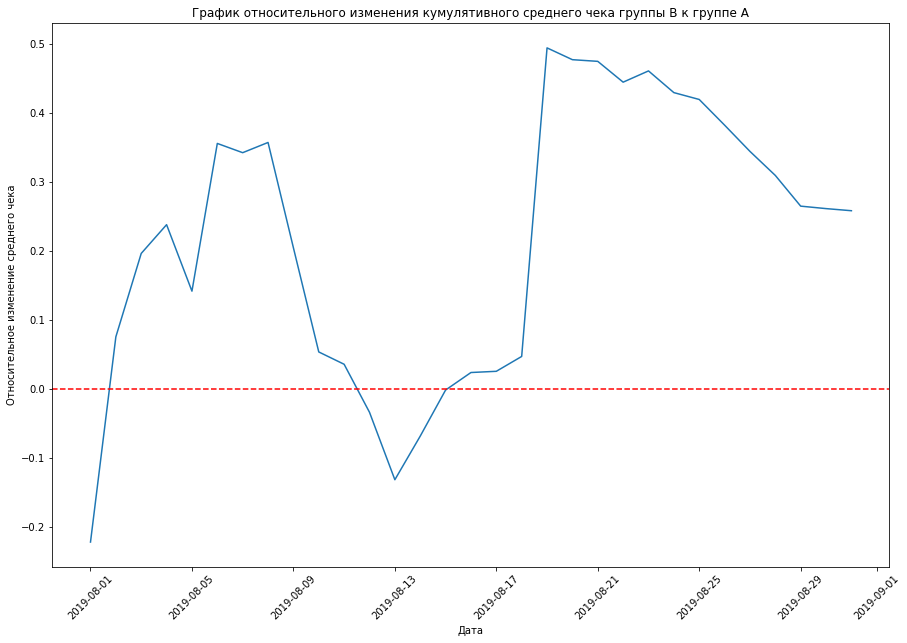

In [34]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


plt.axhline(y=0, color='red', linestyle='--'); 
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата');
plt.ylabel('Относительное изменение среднего чека');

Снова наблюдается нестабильность графика. Средний чек мог так прыгать из-за очень большого количества покупок в отдельно взятые дни. Возможно, произошел некий аналог черной пятницы 17 августа и "бум" продлился несколько дней, после чего наблюдается спад

## 2.4. Построение графика кумулятивной конверсии по группам

Прежде, чем строить график стоит отобразить конверсию, как отдельный столбец таблицы - это важный показатель и стоит предоставить его заказчику как "текстом", так и на графике.

In [35]:
cumulativeData['conversion'] = (cumulativeData['orders'] / cumulativeData['visitors']) * 100
display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,3.337969
1,2019-08-01,B,21,20,101217,713,2.945302
2,2019-08-02,A,44,38,242401,1338,3.288490
3,2019-08-02,B,45,43,266748,1294,3.477589
4,2019-08-03,A,68,62,354874,1845,3.685637


Разделим данные по группам:

In [36]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'] # - А
 
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'] # - B

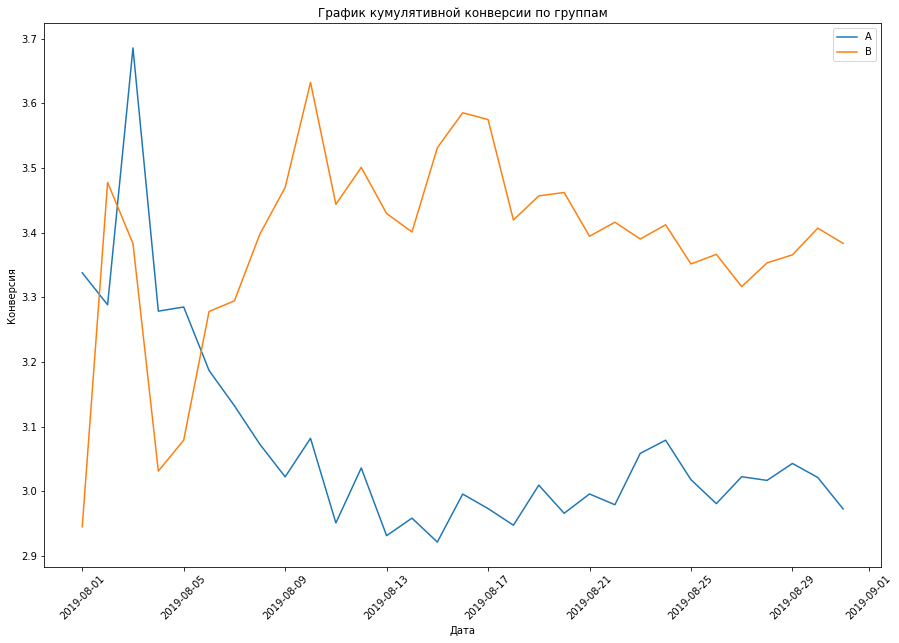

In [37]:
plt.figure(figsize=(15,10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата');
plt.ylabel('Конверсия');
plt.xticks(rotation=45);
plt.legend();

Группа А имела хорошую конверсию, но лишь очень короткий интервал времени, затем произошло резкое падение и конверсия держится на уровне чуть более 3%.
Группа В имеет более результативную конверсию, тоже имел место спал в начале месяца, но потом группу А "обогнали с отрывом"

## 2.5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A

Сперва создадим датафрейм с тремя столбцами с помощью метода merge:

In [38]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,3.337969,2.945302
1,2019-08-02,3.288490,3.477589
2,2019-08-03,3.685637,3.383250
3,2019-08-04,3.278689,3.031481
4,2019-08-05,3.285112,3.079268


Теперь построим график c двумя местами: на нуле и на максимальном "приросте" графика

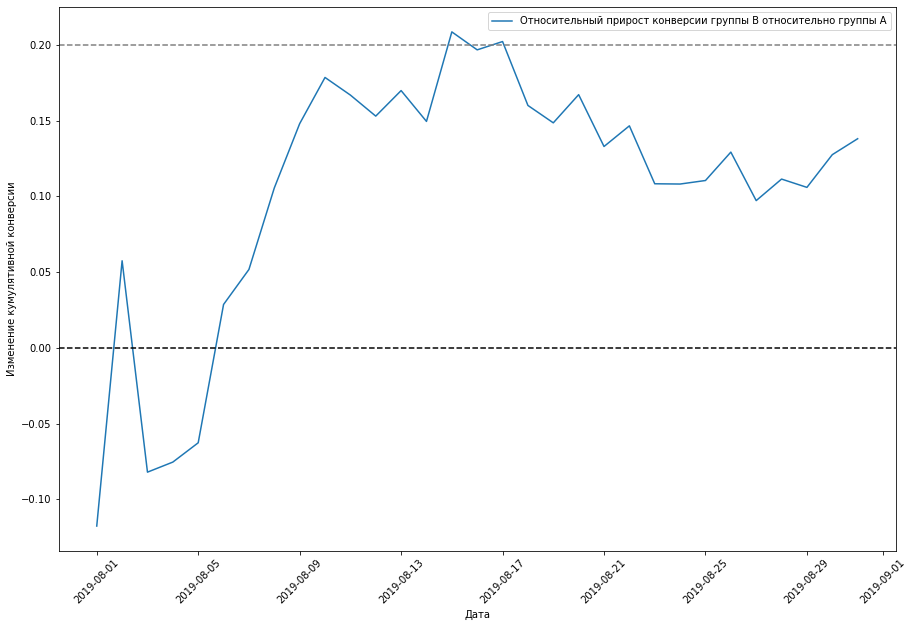

In [39]:
plt.figure(figsize=(15,10))
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A"
)
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивной конверсии')

plt.xticks(rotation=45)


plt.axhline(y=0, color='black', linestyle='--')

plt.axhline(y=0.2, color='grey', linestyle='--')

plt.show()

Видим, что график после не самого продолжительного "проседания" в начале продемонстрировал резкий прирост и в дальнем не было сильных "падений", то есть, поведение стабильно. Еще одно подтверждение факта, что показатели группы В значительно выше.

## 2.6. Постройте точечный график количества заказов по пользователям

Создадим новую таблицу, где оставим только ID пользователя и количество его заказов. Заодно, сможем определить самых активных клиентов интернет-магазина

In [40]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})

ordersByUsers.columns = ['visitorid','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head()

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


In [41]:
ordersByUsers['orders'].value_counts()

1     937
2      64
3      17
5       6
4       3
11      2
8       1
9       1
Name: orders, dtype: int64

Видим, что в подавляющем большинстве пользователи делают один заказ, 2-3 заказа тоже встречаются, но дальше - исключение, а не тенденция.

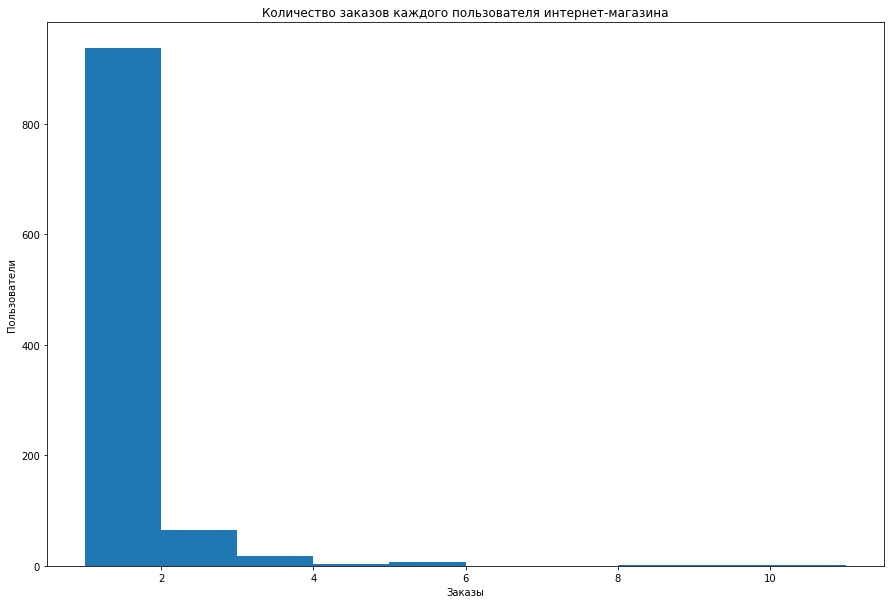

In [42]:
plt.figure(figsize=(15,10))
plt.hist(ordersByUsers['orders']);
plt.title('Количество заказов каждого пользователя интернет-магазина')
plt.xlabel('Заказы');
plt.ylabel('Пользователи');

"Поведение" гистограммы подтверждает вывод, сделанный на прошлом шаге. Посмотрим, что нам скажет точечная диаграмма:

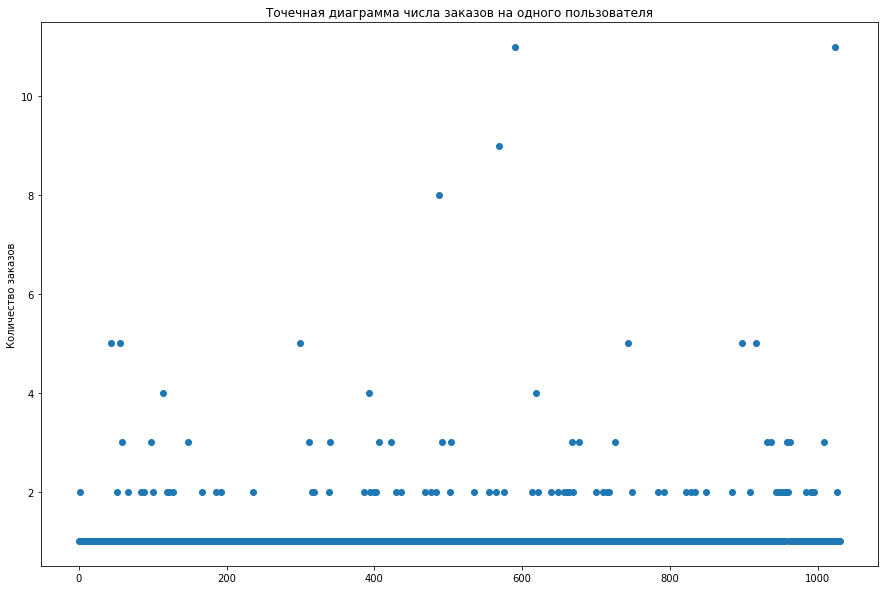

In [43]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,10))
plt.scatter(x_values, ordersByUsers['orders']); 
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Количество заказов');

График показывает, что все-таки есть клиенты, которые совершают 2-5 заказов и это не единичные случаи, в отличии от совершивших 8-11 заказов. Склоняюсь считать аномалиями все, что выше 5-и заказов.

## 2.7. Расчет 95-го и 99-го перцентиля количества заказов на пользователя

Посмотрим перцентили количества заказов

In [44]:
print(np.percentile(ordersByUsers['orders'], [95,96,97,98,99]))

[2. 2. 2. 3. 4.]


Видим, что 4 заказа оформляет лишь 1% клиентов, а 3 заказа - всего 2%. Стоит несколько поменять свою оценку насчет аномалий и отсеивать количество заказов, превышающее 3

## 2.8. Построение точечного графика стоимостей заказов

In [45]:
revenueByUsers = orders.drop(['group', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'revenue' : 'sum'})
revenueByUsers.columns = ['visitorid','revenue']
revenueByUsers.sort_values(by='revenue',ascending=False).head(10)

,visitorid,revenue
463,1920142716,1294500
503,2108080724,202740
1023,4256040402,176490
1026,4266935830,157980
569,2378935119,142939
316,1316129916,94770
314,1307669133,92550
213,888512513,86620
744,3062433592,75459
186,759473111,72000


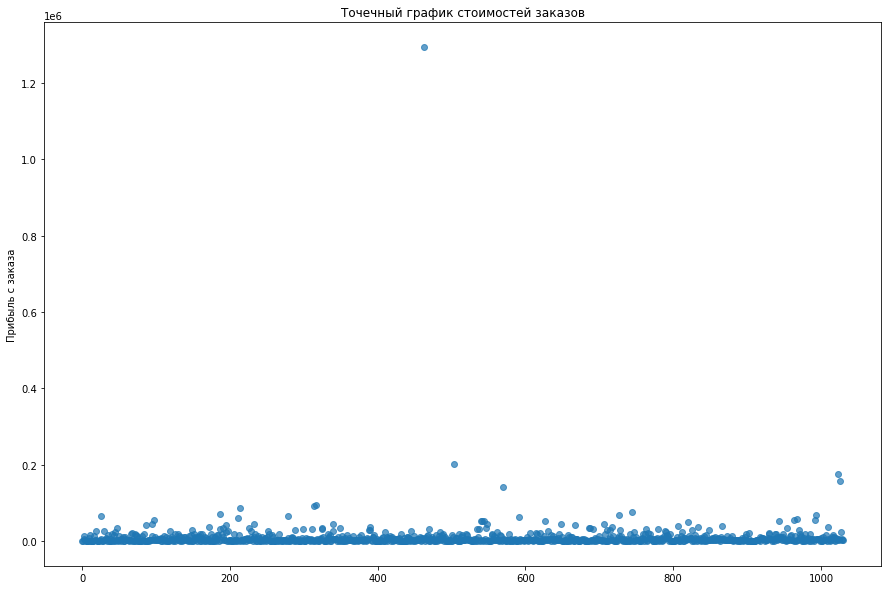

In [46]:
rev_values = pd.Series(range(0,len(revenueByUsers)))

plt.figure(figsize=(15,10))
plt.scatter(rev_values, revenueByUsers['revenue'], alpha = 0.7); 

plt.title('Точечный график стоимостей заказов')
plt.ylabel('Прибыль с заказа');

Есть одна сделка на сумму 1294500. Это здорово, что магазин смог реализовать такую сделку, но стабильности в таких значениях точно нет. Посмотрим, как будет выглядеть график, где диапазон прибыли составит 200000, т.е. следующие значения за описанной сверхприбыльной продажей

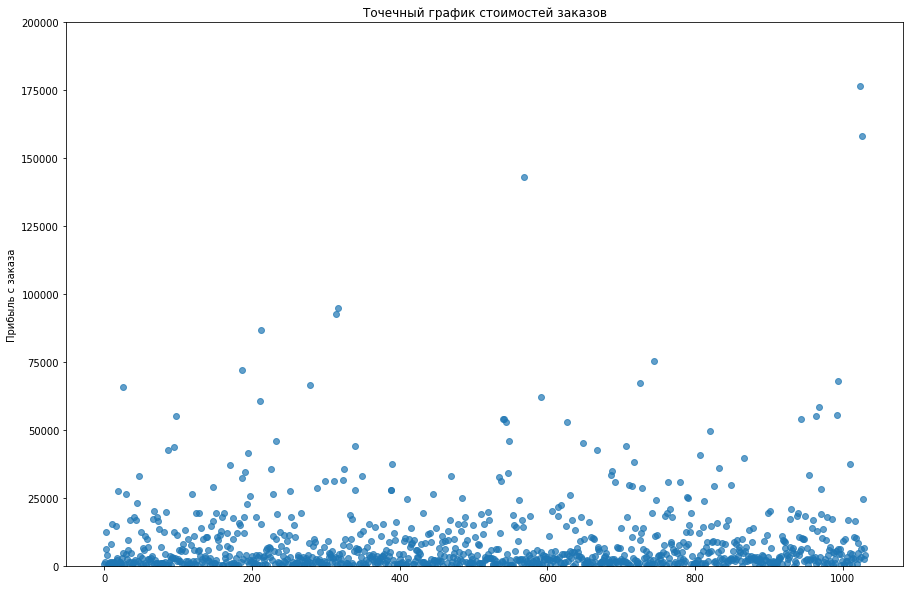

In [47]:
plt.figure(figsize=(15,10))
plt.scatter(rev_values, revenueByUsers['revenue'], alpha = 0.7); 
plt.ylim(0,200000) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Прибыль с заказа');

Стало детальнее, но все-таки тоже не совсем информативно. Ограничим до 100000

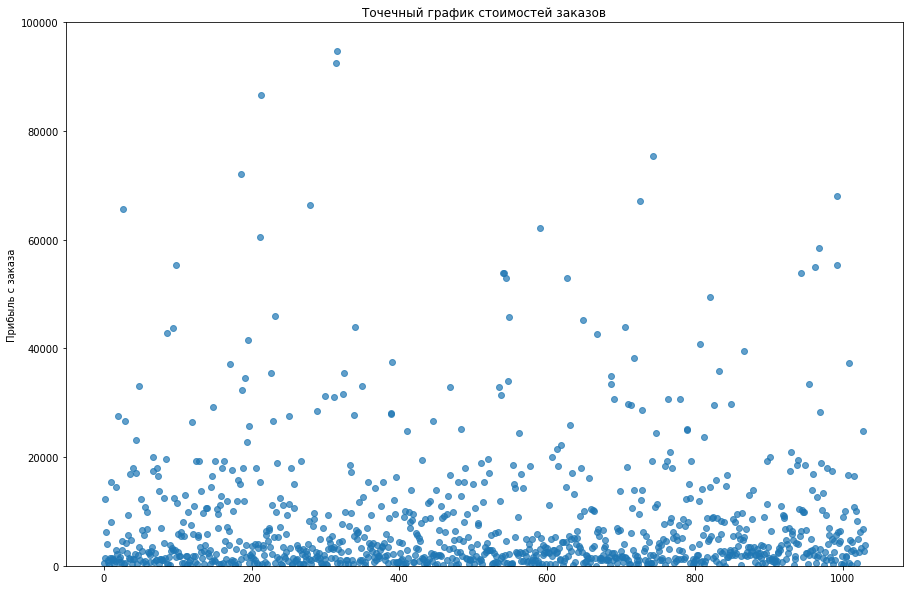

In [48]:
plt.figure(figsize=(15,10))
plt.scatter(rev_values, revenueByUsers['revenue'], alpha = 0.7); 
plt.ylim(0,100000) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Прибыль с заказа');

График показывает, что подавляющее большинство продаж укладывается в 10000. Покупки в диапазоне до 20000 тоже не редки, От 20000 до 40000 также встречаются, но все что выше 40000 - нечто из ряда вон выходящее

## 2.9. Расчет 95-го и 99-го перцентиля стоимости заказов

In [49]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Среди всех клиентов интернет-магазина лишь 5% покупают на сумму 28000, а 58233 - это чек лишь одного процента аудитории. 

In [50]:
print(np.percentile(revenueByUsers['revenue'], [95,96,97,98,99]))

[32899.5 35809.  43717.  53904.  67750. ]


Лишь 3 процента клиентов "набирают" на сумму более 35000, думаю, если отказаться от этих данных, картина радикально не поменяется

## 2.10. Расчет статистической значимости различий в конверсии между группами по «сырым» данным

Прежде, чем осуществлять расчет необходимо определиться с однозначной трактовкой гипотез:
- нулевая гипотеза: равенство конверсии групп
- альтернативная гипотеза: конверсии групп не равны

Добавим информацию о ежедневных посещениях, а также, о кумулятивном количестве посещений

In [51]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']] #получим данные по группе А
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [52]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [53]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']] #получим данные по группе В
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [54]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [55]:
ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [56]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Установим статистическую разницу конверсии между группами:

Создаем новые датафреймы, где у пользователей, когда-либо осуществлявших заказы будет указано количество выполненных заказов

In [57]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [58]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

С помощью критерия Манна-Уитни установим, какая из ранее выдвинутых гипотез может быть отвергнута:

In [59]:
p_value_conversion=st.mannwhitneyu(sampleA, sampleB)[1]
print("p-value по конверсии сырых данных: {0:.5f}".format(p_value_conversion))

p-value по конверсии сырых данных: 0.01679


In [60]:
increase_conversion = data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum()/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1
print("Относительный прирост конверсии группы B: {0:.3f}".format(increase_conversion))

Относительный прирост конверсии группы B: 0.138


In [61]:
alpha = 0.05

if (p_value_conversion < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


p-value меньше 0,05%, что позволяет отвергнуть нулевую гипотезу. Между показателями конверсии явно есть отличия, что подтверждает значение переменной с относительным приростом конверсии группы B к конверсии группы А, т.е. 13%.

## 2.11. Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформируем гипотезы аналогичным образом:
- нулевая гипотеза - средный чек групп А и В равен,
- альтернативная - в чеках есть различия

In [62]:
p_value_check = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print("P-value чека по сырым данным: {0:.5f}".format(p_value_check))

P-value чека по сырым данным: 0.72929


In [63]:
relative_increase_check = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
print('Относительный прирост среднего чека группы B к среднему чеку группы А по сырым данным: {:.2f}'.format(relative_increase_check))

Относительный прирост среднего чека группы B к среднему чеку группы А по сырым данным: 0.26


In [64]:
alpha = 0.05

if (p_value_check < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Cтатистически значимых отличий в среднем чеке между группами нет, следовательно, отвергаем нулевую гипотезу. Однако, если вспомнить, что группа В по многим показателям была "выигрышнее" - результат выглядит несколько сомнительным. Скорее всего, аномалии исказили тест.

## 2.12. Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

Трактовка гипотез остается идентичной: за нулевую гипотезу принимаем равенство конверсии между группами, за альтернативную - если конверсии различны

Расчет будет произведен с учетом следующих выводах, сделанных на прошлых этапах выполнения работы:
- Количество покупок не более 3-х
- Сумма чека не более 35000

In [65]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

Запишем данные, очищенные от аномалий в отдельные переменные:

In [66]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [67]:
p_value_conversion_clean=st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print("p-value по конверсии очищенных данных: {0:.5f}".format(p_value_conversion_clean))

p-value по конверсии очищенных данных: 0.01626


In [68]:
increase_conversion_clean = sampleBFiltered.mean()/sampleAFiltered.mean()-1
print("Относительный прирост конверсии группы B по очищенным данным: {0:.3f}".format(increase_conversion_clean))

Относительный прирост конверсии группы B по очищенным данным: 0.136


In [69]:
alpha = 0.05

if (p_value_conversion_clean < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Показатели конверсий не равны, как это было в случае с сырыми данными. Группа В по-прежнему продолжает демонстрировать более высокие показатели конверсии

## 2.13. Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Трактовка гипотез остается идентичной: за нулевую гипотезу принимаем равенство конверсии между группами, за альтернативную - если конверсии различны

In [70]:
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.945
0.020


Видим, что p-value равен 0,945, соответственно, нет оснований отвергнуть нулевую гипотезу. Статистическая значимость данных после отбора аномалий не изменилась.

**Выводы:**
- подавляющее большинство клиентов интернет-магазина осуществляют лишь одну покупку, в течение рассмотренного интервала времени
- 95% клиентов делают покупки с чеком менее 28000 рублей, но бывают и более крупные сделки, например, почти в 1,3 млн. Увы, нельзя говорить, что такие сделки регулярны
- Показатели группы В выглядят значительно перспективнее группы А 
- Относительный прирост конверсии по сырым данным составляет 13,8% в пользу группы В
- Относительный прирост конверсии по очищенным данным составляет 13,6%
- Относительный прирост среднего чека по сырым данным составляет 26%
- Относительный прирост среднего чека по очищенным данным составляет 13% - предположение, что аномалии влияли на ход исследования подтвердилось

# 3. Общий вывод

Можно порекомендовать руководству интернет-магазина следующие потенциально прибыльные гипотезы:
- №7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- №0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- №8 Запустить акцию, дающую скидку на товар в день рождения
- №2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

**Резюмируя:** промежуточный вывод шага 2 позволяет подчеркнуть, что результаты группы В выше группы А по всем показателям: как конверсия, так и прирост среднего чека.
Статистически значимого различия между группами не наблюдается (как по сырым данным, так и по исправленным)

Исходя из этих доводов, считаю необходимым порекомендовать интернет-магазину остановку теста и зафиксировать победу группы В, сам тест, соответственно считать успешным. Можно переходить к проверке другой гипотезы.

# Спасибо за внимание!